<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/SN_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


<h1>Extracting Stock Data Using a Python Library</h1>

A company's stock share is a piece of the company more precisely:
<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]</p></b>

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges. 
<p>You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.</p>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Info</li>
        <li>Using yfinance to Extract Historical Share Price Data</li>
        <li>Using yfinance to Extract Historical Dividends Data</li>
        <li>Exercise</li>
    </ul>
</div>

<hr>


In [1]:
#!pip install yfinance==0.1.67
!pip install yfinance==0.2.4
!pip install pandas==1.3.3
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0
print('Pip Installed Successfully')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 57.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
       

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
#Define Graphing Function
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# => I) Apple

## 1) Use yfinance Library to Extract Apple Stock Data

Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.

In [3]:
apple = yf.Ticker("AAPL")

### To Download `apple.json` file

In [31]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

--2023-07-07 11:24:51--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json.1’

apple.json.1        100%[===================>]   5.57K  --.-KB/s    in 0s      

2023-07-07 11:24:51 (33.1 MB/s) - ‘apple.json.1’ saved [5699/5699]



### i) Apple Stock Info

Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.

In [4]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable    
    print("Type:", type(apple_info))
apple_info

Type: <class 'dict'>


{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

We can get the <code>'country'</code> using the key country to find the country the stock belongs to

In [5]:
apple_info['country']

'United States'

We can get the <code>'sector'</code> using the key sector to find the sector the stock belongs to

In [6]:
apple_info['sector']

'Technology'

### ii) Extracting Apple Share Price

A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

In [7]:
apple_share_price_data = apple.history(period="max")

Available paramaters for the `history()` method are:

* period: data period to download (Either Use period parameter or use start and end) Valid periods are: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
* interval: data interval (intraday data cannot extend last 60 days) Valid intervals are: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
* start: If not using period - Download start date string (YYYY-MM-DD) or datetime.
* end: If not using period - Download end date string (YYYY-MM-DD) or datetime.
* prepost: Include Pre and Post market data in results? (Default is False)
* auto_adjust: Adjust all OHLC automatically? (Default is True)
* actions: Download stock dividends and stock splits events? (Default is True)

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.

In [8]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087894,0.087894,0.087461,0.087461,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0


Find the trading on yesterday (1 day before)

In [9]:
apple_share_price_data = apple.history(period="1d")

In [10]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-07-14 00:00:00-04:00,190.229996,191.179993,189.630005,190.690002,41573900,0.0,0.0


Find the trading on the first day (first row)

In [11]:
apple_share_price_data = apple.history(period="max")

In [12]:
apple_share_price_data.head(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [13]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:


<AxesSubplot:xlabel='Date'>

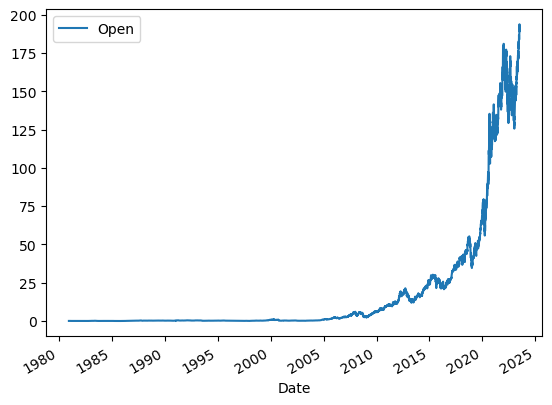

In [14]:
apple_share_price_data.plot(x="Date", y="Open")

### iii) Extracting Apple Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [15]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-05-06 00:00:00-04:00    0.230000
2022-08-05 00:00:00-04:00    0.230000
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
2023-05-12 00:00:00-04:00    0.240000
Name: Dividends, Length: 79, dtype: float64

We can plot the dividends overtime:


<AxesSubplot:xlabel='Date'>

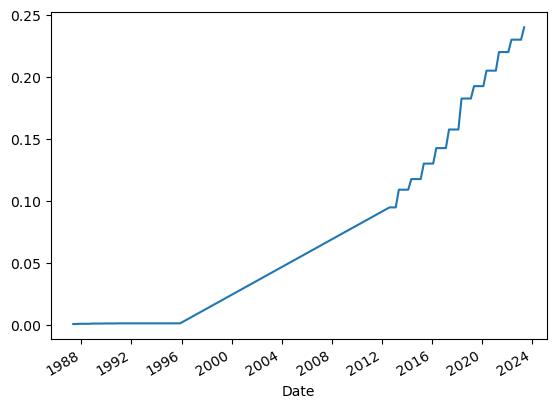

In [16]:
apple.dividends.plot()

# => II) AMD (Advanced Micro Devices)

## 2) Use yfinance Library to Extract AMD Stock Data

Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.


In [17]:
amd = yf.Ticker("AMD")

### To Download `amd.json` file

In [33]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

--2023-07-07 11:35:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5838 (5.7K) [application/json]
Saving to: ‘amd.json.1’

amd.json.1          100%[===================>]   5.70K  --.-KB/s    in 0s      

2023-07-07 11:35:38 (46.9 MB/s) - ‘amd.json.1’ saved [5838/5838]



### i) AMD Stock Info

In [18]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

We can get the <code>'country'</code> using the key country to find the country the stock belongs to

In [19]:
amd_info['country']

'United States'

We can get the <code>'sector'</code> using the key sector to find the sector the stock belongs to

In [20]:
amd_info['sector']

'Technology'

### ii) Extracting AMD Share Price

Obtain stock data for AMD using the `history` function, set the `period` to max. Find the `Volume` traded on the first day (first row).


In [21]:
amd_info = amd.history(period="max")

In [22]:
amd_info.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.0,3.302083,3.125000,3.145833,219600,0.0,0.0
1980-03-18 00:00:00-05:00,0.0,3.125000,2.937500,3.031250,727200,0.0,0.0
1980-03-19 00:00:00-05:00,0.0,3.083333,3.020833,3.041667,295200,0.0,0.0
1980-03-20 00:00:00-05:00,0.0,3.062500,3.010417,3.010417,159600,0.0,0.0
1980-03-21 00:00:00-05:00,0.0,3.020833,2.906250,2.916667,130800,0.0,0.0


Find the trading on previous yesterday (2 day before)

In [23]:
amd_info = amd.history(period="2d")

In [24]:
amd_info.head(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-07-13 00:00:00-04:00,115.760002,116.160004,113.580002,115.919998,49206700,0.0,0.0


Find the trading on the first day (first row)

In [25]:
amd_info = amd.history(period="max")

In [26]:
amd_info.head(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.0,3.302083,3.125,3.145833,219600,0.0,0.0


Find the `Volume` traded on the first day (first row).

In [27]:
amd_info.Volume.head(1)

Date
1980-03-17 00:00:00-05:00    219600
Name: Volume, dtype: int64

In [28]:
amd_info = amd.history(period="max")

Available paramaters for the `history()` method are:

* period: data period to download (Either Use period parameter or use start and end) Valid periods are: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
* interval: data interval (intraday data cannot extend last 60 days) Valid intervals are: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
* start: If not using period - Download start date string (YYYY-MM-DD) or datetime.
* end: If not using period - Download end date string (YYYY-MM-DD) or datetime.
* prepost: Include Pre and Post market data in results? (Default is False)
* auto_adjust: Adjust all OHLC automatically? (Default is True)
* actions: Download stock dividends and stock splits events? (Default is True)

In [29]:
amd_info.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:


<AxesSubplot:xlabel='Date'>

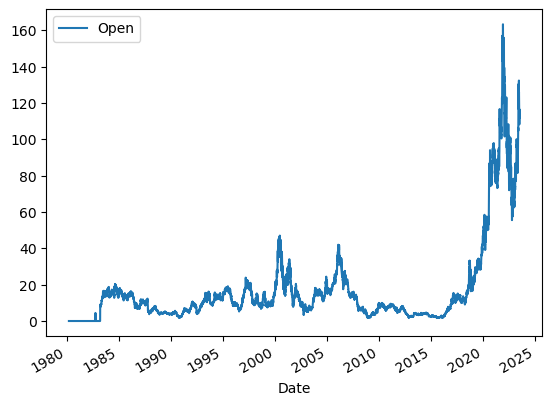

In [30]:
amd_info.plot(x="Date", y="Open")

### iii) Extracting AMD Dividends


In [31]:
amd.dividends

Series([], Name: Dividends, dtype: float64)

<AxesSubplot:xlabel='Date'>

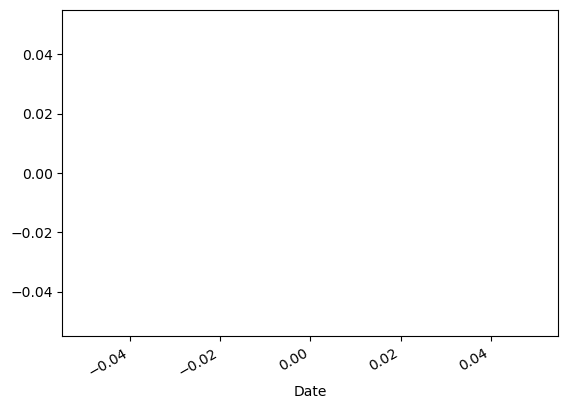

In [32]:
amd.dividends.plot()

# => III) Tesla

## 3) Use yfinance to Extract Tesla Stock Data


In [33]:
tesla=yf.Ticker("TSLA")

In [35]:
tesla_data=tesla.history(period="max")

In [ ]:
import json
with open('tesla.json') as json_file:
    tesla_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
tesla_info

In [36]:
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Find the trading on 5 days before

In [37]:
tesla_data = amd.history(period="5d")

In [38]:
tesla_data.head(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-07-10 00:00:00-04:00,113.0,113.610001,109.879997,113.580002,49330200,0.0,0.0


In [39]:
tesla_data=tesla.history(period="max")

In [40]:
tesla_data.reset_index(inplace=True)

<AxesSubplot:xlabel='Date'>

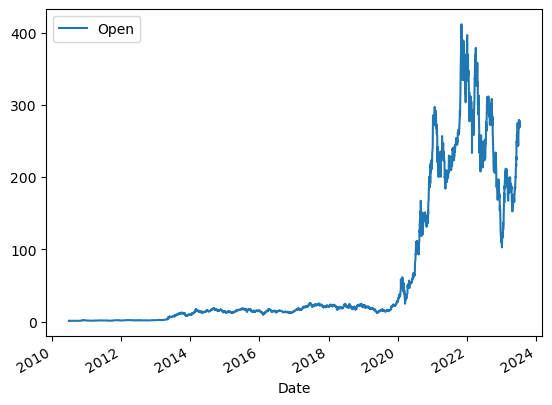

In [41]:
tesla_data.plot(x="Date", y="Open")

In [42]:
tesla.dividends

Series([], Name: Dividends, dtype: float64)

<AxesSubplot:xlabel='Date'>

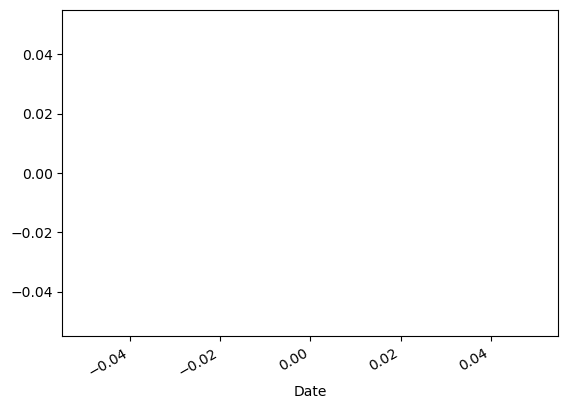

In [43]:
tesla.dividends.plot()

## Question 2: Use Webscraping to Extract Tesla Revenue Data


In [62]:
#The below url contains html tables with data about world population.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [63]:
# get the contents of the webpage in text format and store in a variable called data
html_data  = requests.get(url).text

In [64]:
soup = BeautifulSoup(html_data,"html.parser")

In [65]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for table in soup.find_all('table'):
    if ('Tesla Quarterly Revenue' in table.find('th').text):
        for row in table.find_all('tr'):
            col = row.find_all('td')
            if col != []:
                date = col[0].text
                revenue = col[1].text
                tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

In [66]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [67]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [68]:
#find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>

In [69]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Question 5: Plot Tesla Stock Graph


In [71]:
pd.read_html(str(tables[5]), flavor='bs4')

[                     Link Preview  HTML Code (Click to Copy)
 0  Tesla Revenue 2010-2022 | TSLA                        NaN
 1                     Macrotrends                        NaN
 2                          Source                        NaN]

In [75]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

NameError: name 'make_graph' is not defined

## Question 3: Use yfinance to Extract Gamestop Stock Data


In [44]:
gamestop=yf.Ticker("GME")

In [45]:
gme_data=gamestop.history(period="max")

In [46]:
gme_data.reset_index(inplace=True)

In [47]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 6: Plot GameStop Stock Graph


In [76]:
pd.read_html(str(tables[5]), flavor='bs4')

[                     Link Preview  HTML Code (Click to Copy)
 0  Tesla Revenue 2010-2022 | TSLA                        NaN
 1                     Macrotrends                        NaN
 2                          Source                        NaN]

In [77]:
make_graph(gme_data, gme_revenue, 'GameStop')

NameError: name 'make_graph' is not defined

# End

## Question 4: Use Webscraping to Extract GME Revenue Data


In [78]:
#The below url contains html tables with data about world population.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html."

In [79]:
# get the contents of the webpage in text format and store in a variable called data
html_data  = requests.get(url).text

In [80]:
soup = BeautifulSoup(html_data,"html.parser")

In [81]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for table in soup.find_all('table'):
    if ('GameStop Quarterly Revenue' in table.find('th').text):
        for row in table.find_all('tr'):
            col = row.find_all('td')
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')
                gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

In [82]:
gme_revenue.tail()

,Date,Revenue


In [83]:
#find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>